# YOLO v5 커스텀 데이터 학습
---

### 데이터 준비
**roboflow에서 bounding box 데이터 다운로드**
- https://public.roboflow.com/
  1. Object Detection Datasets
  2. 로그인
  3. 선택: YOLO v5 PyTorch, show download code
  4. _Terminal: 복사
  5. url 실행
- dataset 폴더에 해당 파일(obd) 다 넣음

**YOLO v5 깃허브 다운로드**
- https://github.com/ultralytics/yolov5
  1. code>https 복사
  2. !git clone 붙여넣기
  3. !pip install -r requirements.txt 설치
---
- Roboflow 데이터셋: Raccoon Object Detection Dataset
- 경로: dataset/

In [ ]:
# !mkdir dataset

In [ ]:
# roboflow에서 다운로드 받은 bounding box 데이터 URL

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   894  100   894    0     0   1147      0 --:--:-- --:--:-- --:--:--  1146
100 11.5M  100 11.5M    0     0  4128k      0  0:00:02  0:00:02 --:--:-- 8419k
Archive:  roboflow.zip
 extracting: /content/dataset/README.dataset.txt  
 extracting: /content/dataset/README.roboflow.txt  
 extracting: /content/dataset/data.yaml  
   creating: /content/dataset/export/
   creating: /content/dataset/export/images/
 extracting: /content/dataset/export/images/raccoon-100_jpg.rf.YWIftfgUdZqJLTkvI9W2.jpg  
 extracting: /content/dataset/export/images/raccoon-101_jpg.rf.ebfr15yC06H7KdSNWJkC.jpg  
 extracting: /content/dataset/export/images/raccoon-102_jpg.rf.Vtizg4N4D1Wn9fv4sBaJ.jpg  
 extracting: /content/dataset/export/images/raccoon-103_jpg.rf.yx4ScGFA2FZ23qfitAfV.jpg  
 extracting: /content/dataset/export/images/raccoon-104_jpg.rf.HdpZVmq1te

### YOLO v5 깃허브 다운로드

In [ ]:
# !git clone https://github.com/ultralytics/yolov5.git/

Cloning into 'yolov5'...
remote: Enumerating objects: 15705, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 15705 (delta 9), reused 23 (delta 6), pack-reused 15672
Receiving objects: 100% (15705/15705), 14.44 MiB | 4.30 MiB/s, done.
Resolving deltas: 100% (10755/10755), done.


In [ ]:
%cd /content/yolov5

/content/yolov5


**필요한 라이브러리 설치**

In [ ]:
# !pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.4/591.4 kB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 23.6 MB/s eta 0:00:00


### 경로 저장 파일 생성
- yaml 파일 수정

In [ ]:
from glob import glob

img_list = glob('/content/dataset/export/images/*jpg')
len(img_list)

196

In [ ]:
img_list[0]

'/content/dataset/export/images/raccoon-161_jpg.rf.0Mle2LMLqLVbuWufJSM6.jpg'

In [ ]:
from sklearn.model_selection import train_test_split

train_img, val_img = train_test_split(img_list, test_size=0.2, random_state=1234)
len(train_img), len(val_img)

(156, 40)

In [ ]:
# train.txt 파일을 열어서 train_img(훈련용 이미지) 경로 저장
with open('/content/dataset/train.txt', 'w') as f:
    f.write('\n'.join(train_img) + '\n')

In [ ]:
# val.txt 파일을 열어서 val_img(검증용 이미지) 경로 저장
with open('/content/dataset/val.txt', 'w') as f:
    f.write('\n'.join(val_img) + '\n')

**data.yaml 수정 전**


```
train: ../train/images
val: ../valid/images

nc: 1
names: ['raccoon']
```

**data.yaml 수정 후**


```
names:
- raccoon
nc: 1
train: /content/dataset/train.txt
val: /content/dataset/val.txt
```




In [ ]:
# yaml 파일 수정
import yaml

with open('/content/dataset/data.yaml', 'r') as f:
    data = yaml.load(f, Loader=yaml.FullLoader)
print(data) # yaml 파싱

data['train'] = '/content/dataset/train.txt'
data['val'] = '/content/dataset/val.txt'

with open('/content/dataset/data.yaml', 'w') as f:
    yaml.dump(data, f)
print(data) # yaml 수정

{'train': '../train/images', 'val': '../valid/images', 'nc': 1, 'names': ['raccoon']}
{'train': '/content/dataset/train.txt', 'val': '/content/dataset/val.txt', 'nc': 1, 'names': ['raccoon']}


### YOLO v5 학습하기
- Results saved to runs/train/racoon_yolov5s
<br>➡️ /content/yolov5/runs/train/racoon_yolov5s에 학습된 파일 자동 저장 중

In [ ]:
!python train.py --img 416 --batch 16 --epochs 50 --data /content/dataset/data.yaml --cfg /content/yolov5/models/yolov5s.yaml --weight yolov5s.pt --name racoon_yolov5s

train: weights=yolov5s.pt, cfg=/content/yolov5/models/yolov5s.yaml, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=racoon_yolov5s, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, an

### 검증용 데이터로 모델 테스트하기
1. Results saved to runs/detect/exp에 저장됨<br>
`--weights`: 저장된 weights<br>
`--save`: 텍스트로 저장<br>
`--img`: 이미지 사이즈 지정<br>
`--conf`: 해당 확률 이상 라쿤<br>
`--source`: 이미지 경로<br>

2. yolov5/detect.py 수정
```
                # Write results
                for *xyxy, conf, cls in reversed(det):
                    if save_txt:  # Write to file
                        print('****', txt_path, '****') # 추가
```
3. 좌표 경로 확인하기: runs/detect/exp/labels/

In [ ]:
from IPython.display import Image
import os

In [ ]:
val_img_path = val_img[1]
print(val_img_path)

/content/dataset/export/images/raccoon-56_jpg.rf.IR7dpRC8jTsXirB76IrI.jpg


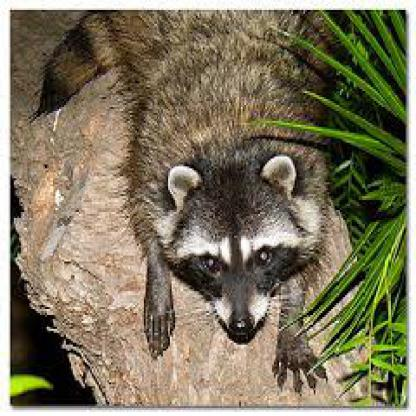

In [ ]:
Image('/content/dataset/export/images/raccoon-56_jpg.rf.IR7dpRC8jTsXirB76IrI.jpg')

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/racoon_yolov5s/weights/best.pt --save-txt --img 416 --conf 0.5 --source '{val_img_path}'

detect: weights=['/content/yolov5/runs/train/racoon_yolov5s/weights/best.pt'], source=/content/dataset/export/images/raccoon-56_jpg.rf.IR7dpRC8jTsXirB76IrI.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
**** runs/detect/exp/labels/raccoon-56_jpg.rf.IR7dpRC8jTsXirB76IrI ****
image 1/1 /content/dataset/export/images/raccoon-56_jpg.rf.IR7dpRC8jTsXirB76IrI.jpg: 416x416 1 raccoon, 7.4ms
Speed: 0.4ms pre-process, 7.4ms inference, 1.4ms NMS per image at shape (1, 3, 416,

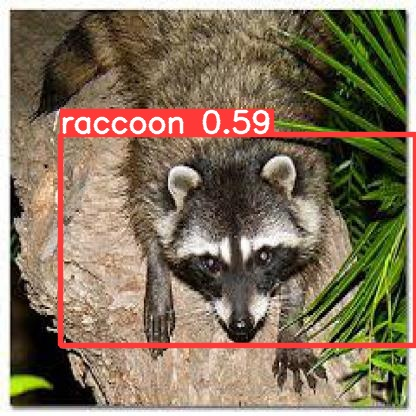

In [ ]:
val_img_path = '/content/yolov5/runs/detect/exp/raccoon-56_jpg.rf.IR7dpRC8jTsXirB76IrI.jpg'
Image(f'{val_img_path}')